## Analisis Deskriptif dan Inferensial Dataset Womens Clothing E-Commerce Reviews 

## Identifikasi Masalah

### Problem Statement using SMART 

Specific    : Mengetahui opini konsumen mengenai produk pakaian perempuan melalui review di toko online  

Measureable : Melakukan visualisasi data, analisis deskriptif, dan inferensial terhadap beberapa kolom tabel dataset 

Achievable  : Dengan menggunakan library python dan tableau, visualisasi data, analisis deskriptif, dan inferensial dapat dilakukan

Relevant    : Dengan melakukan visualisasi data, analisis deskriptif, dan inferensial terhadap beberapa kolom tabel dataset dapat diketahui opini konsumen terhadap suatu produk pakaian

Time-Bound  : 1 minggu

Kesimpulan  : Untuk mengetahui opini konsumen terhadap produk pakaian perempuan di toko online, beberapa kolom tabel dataset akan dilakukan visualiasi, analisis deskriptif, dan inferensial dalam kurun waktu 1 minggu 

### Penjabaran Masalah menggunakan 5W+1H

Kelompok usia manakah yang paling banyak membeli dan memberikan rating terhadap produk pakaian?

Produk pakaian apa saja yang paling banyak mendapatkan review positif?

Produk pakaian apa saja yang paling banyak mendapatkan review negatif?

Produk-produk apa saja yang diberikan rating rendah namun konsumen masih merekomendasikan produk?

Apakah terdapat korelasi antara usia konsumen dengan pemberian rating?

Bagaimana pengaruh rating terhadap kesediaan pembeli dalam merekomendasikan produk?

## Data Loading

[Link Sumber Dataset](https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews)

In [1]:
# Melakukan import library yang dibutuhkan
import pandas as pd 
from scipy import stats
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# Melalukan load data .csv dan menampilkannya
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [2]:
# Menampilkan 5 data teratas
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


Berdasarkan informasi di atas, terdapat data yang tidak memiliki nilai yaitu pada kolom Title

In [3]:
# Menampilkan informasi mengenai data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


Berdasarkan informasi di atas, kolom title cukup banyak memiliki data yang tidak memiliki nilai

## Data Cleaning

Agar analisis yang dilakukan dapat berjalan dengan lancar, saya akan membersihkan dataset terlebih dahulu. Saya akan melakukan drop terhadap kolom yang datanya tidak memiliki nilai

In [4]:
# Melakukan drop terhadap data yang memiliki kolom yang tidak memiliki nilai
df = df.dropna()
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


Setelah dilakukan drop data yang tidak memiliki nilai menggunakan df.dropna(), tersisa 19662 data. Selanjutnya saya akan melakukan drop terhadap kolom yang tidak dipakai dalam proses analisis

In [5]:
# Melakukan drop terhadap kolom yang tidak dibutuhkan
del df['Unnamed: 0']
del df['Positive Feedback Count']
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,General,Dresses,Dresses


Setelah dilakukan drop kolom menggunakan del df, tersisa 9 kolom. Berikutnya saya akan memperbaiki typo dari divisi produk dan mengubah kolom Recommended IND menjadi bentuk string agar dapat diubah menjadi "Yes" dan "No"

In [6]:
df['Division Name'] = df['Division Name'].str.replace('Initmates', 'Intimates')
df['Recommended IND'] = df['Recommended IND'].astype(str)
df['Recommended IND'] = df['Recommended IND'].str.replace('1', 'Yes')
df['Recommended IND'] = df['Recommended IND'].str.replace('0', 'No')

df

C:\Users\ahmad\AppData\Local\Temp\ipykernel_5548\1907903943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Division Name'] = df['Division Name'].str.replace('Initmates', 'Intimates')
C:\Users\ahmad\AppData\Local\Temp\ipykernel_5548\1907903943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Recommended IND'] = df['Recommended IND'].astype(str)
C:\Users\ahmad\AppData\Local\Temp\ipykernel_5548\1907903943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,No,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Yes,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,Yes,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,No,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,Yes,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,Yes,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,Yes,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,No,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,Yes,General,Dresses,Dresses


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19662 entries, 2 to 23485
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Clothing ID      19662 non-null  int64 
 1   Age              19662 non-null  int64 
 2   Title            19662 non-null  object
 3   Review Text      19662 non-null  object
 4   Rating           19662 non-null  int64 
 5   Recommended IND  19662 non-null  object
 6   Division Name    19662 non-null  object
 7   Department Name  19662 non-null  object
 8   Class Name       19662 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.5+ MB


Setelah selesai melakukan pembersihan terhadap data, selanjutnya saya akan membuat kolom baru bernama Kelompok Usia yang nantinya akan digunakan dalam analisis

Menurut Permenkes No. 25 Tahun 2016 mengenai Rencana Aksi Nasional Kesehatan Lanjut Usia Tahun 2016-2019 :

Remaja: 10-19 tahun

Dewasa: 19-44 tahun

Pra lanjut usia: 45-59 tahun

Lanjut usia : 60 tahun ke atas

In [8]:
i=10
Remaja = []

while i<19:
    Remaja.append(i)
    i+=1

i=19
Dewasa=[]

while i<45:
  Dewasa.append(i)
  i+=1

i=45
Pra_Lanjut_Usia=[]

while i<60:
  Pra_Lanjut_Usia.append(i)
  i+=1

i=60
Lanjut_Usia=[]

while i<100:
    Lanjut_Usia.append(i)
    i+=1
    

penampung = []

for i in df['Age']:
  if i in (Remaja):
    penampung.append('Remaja')
  elif i in (Dewasa):
    penampung.append('Dewasa')
  elif i in (Pra_Lanjut_Usia):
    penampung.append('Pra Lanjut Usia')
  elif i in (Lanjut_Usia):
    penampung.append('Lanjut Usia')

df['Kelompok Usia'] = penampung

df.head(10)

C:\Users\ahmad\AppData\Local\Temp\ipykernel_5548\4277847579.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kelompok Usia'] = penampung


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Kelompok Usia
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,No,General,Dresses,Dresses,Lanjut Usia
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Yes,General Petite,Bottoms,Pants,Pra Lanjut Usia
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,Yes,General,Tops,Blouses,Pra Lanjut Usia
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,No,General,Dresses,Dresses,Pra Lanjut Usia
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,Yes,General Petite,Tops,Knits,Dewasa
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,Yes,General Petite,Tops,Knits,Dewasa
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,Yes,General,Dresses,Dresses,Dewasa
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,Yes,General,Dresses,Dresses,Dewasa
10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,No,General,Dresses,Dresses,Pra Lanjut Usia
12,1095,53,Perfect!!!,More and more i find myself reliant on the rev...,5,Yes,General Petite,Dresses,Dresses,Pra Lanjut Usia


Setelah selesai membuat kolom Kelompok Usia, saya juga akan membuat kolom bernama Detail Rating. Kolom ini juga nantinya akan digunakan dalam melakukan analisis

In [9]:
penampung = []
Netral =[3]
Positif =[4,5]
Negatif =[1,2]

for i in df['Rating']:
  if i in (Netral):
    penampung.append('Netral')
  elif i in (Positif):
    penampung.append('Positif')
  elif i in (Negatif):
    penampung.append('Negatif')
  

df['Detail Rating'] = penampung

df.head(10)

C:\Users\ahmad\AppData\Local\Temp\ipykernel_5548\4066358286.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Detail Rating'] = penampung


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Kelompok Usia,Detail Rating
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,No,General,Dresses,Dresses,Lanjut Usia,Netral
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Yes,General Petite,Bottoms,Pants,Pra Lanjut Usia,Positif
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,Yes,General,Tops,Blouses,Pra Lanjut Usia,Positif
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,No,General,Dresses,Dresses,Pra Lanjut Usia,Negatif
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,Yes,General Petite,Tops,Knits,Dewasa,Positif
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,Yes,General Petite,Tops,Knits,Dewasa,Positif
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,Yes,General,Dresses,Dresses,Dewasa,Positif
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,Yes,General,Dresses,Dresses,Dewasa,Positif
10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,No,General,Dresses,Dresses,Pra Lanjut Usia,Netral
12,1095,53,Perfect!!!,More and more i find myself reliant on the rev...,5,Yes,General Petite,Dresses,Dresses,Pra Lanjut Usia,Positif


Setelah melakukan pembersihan data, berikutnya saya akan melakukan analisis dan perhitungan 

## Analisis dan Perhitungan 

Saya akan melihat kelompok usia yang paling banyak membeli sekaligus memberikan rating terhadap produk pakaian

#### Kelompok usia manakah yang paling banyak membeli dan memberikan rating terhadap produk pakaian?

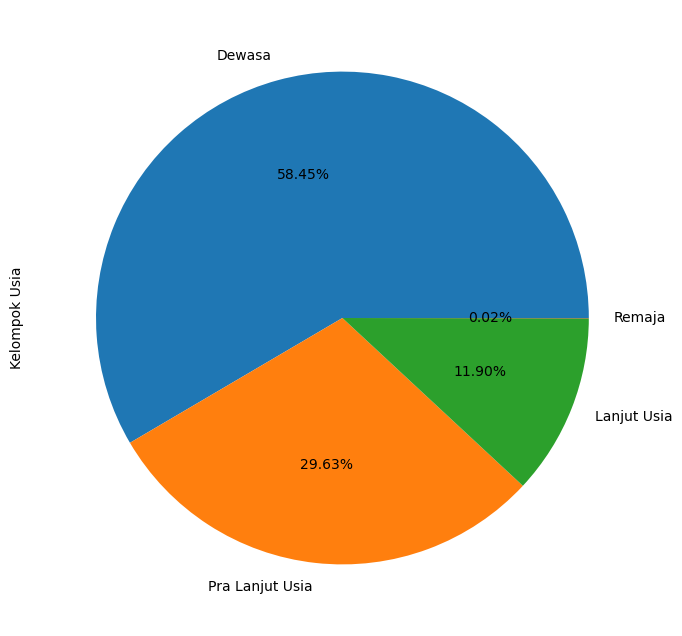

In [10]:
fig,ax1 = plt.subplots(figsize=(8,8))

df['Kelompok Usia'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()

Berdasarkan pie chart di atas, kelompok usia dewasa adalah kelompok usia yang paling banyak membeli dan memberikan rating terhadap produk pakaian sedangkan kelompok usia remaja adalah kelompok usia yang paling sedikit membeli dan memberikan rating terhadap produk pakaian. Selanjutnya saya akan melihat produk apakah yang paling banyak mendapatkan review positif  

#### Produk pakaian apa saja yang paling banyak mendapatkan review positif?

<AxesSubplot:>

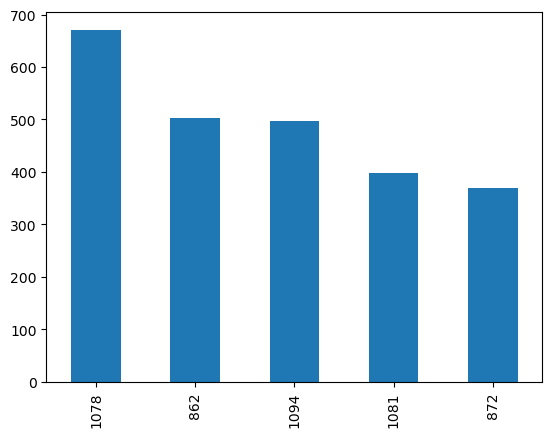

In [12]:
df['Clothing ID'][df['Detail Rating']=='Positif'].value_counts().head(5).plot(kind='bar')

Berdasarkan pie chart di atas, produk dengan id 1078, 862, 1094, 1081, 872 merupakan lima produk dengan rating positif terbanyak. Selanjutnya saya akan melihat produk apakah yang paling banyak mendapatkan review negatif

#### Produk pakaian apa saja yang paling banyak mendapatkan review negatif?

<AxesSubplot:>

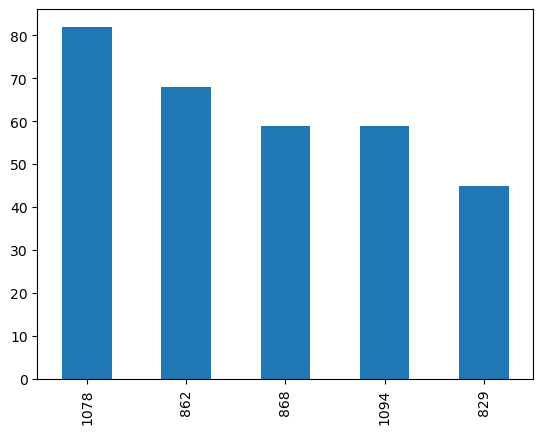

In [13]:
df['Clothing ID'][df['Detail Rating']=='Negatif'].value_counts().head(5).plot(kind='bar')


Berdasarkan pie chart di atas, produk dengan id 1078, 862, 868, 1094, 829 merupakan lima produk dengan rating negatif tertinggi. Berikutnya saya akan melihat produk-produk yang diberikan rating rendah namun masih direkomendasikan oleh konsumen

#### Produk-produk apa saja yang diberikan rating rendah namun konsumen masih merekomendasikan produk?

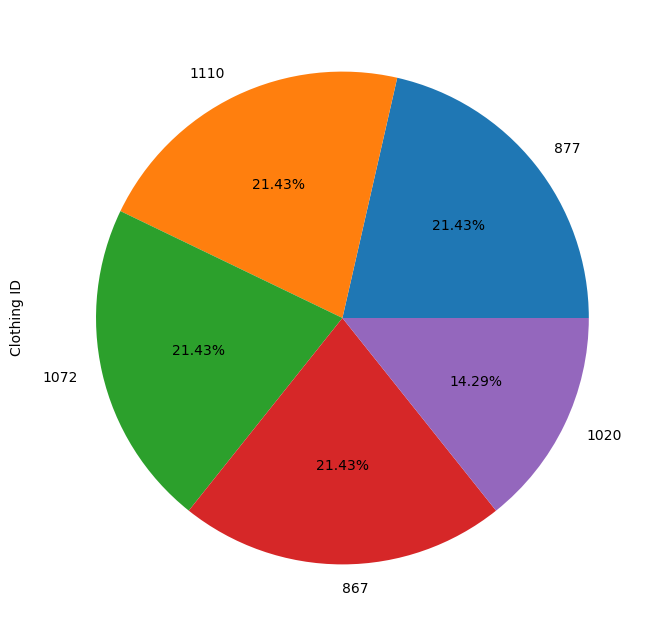

In [14]:
fig,ax1 = plt.subplots(figsize=(8,8))

df['Clothing ID'][(df['Detail Rating']=='Negatif')&(df['Recommended IND']=='Yes')].value_counts().head(5).plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()

Berdasarkan informasi di atas, didapatkan produk dengan ID 877, 1110, 1072, 867, 1020 merupakan produk dengan rating rendah namun tetap direkomendasikan beberapa konsumen

### Analisis Deskriptif

Saya akan melakukan analisis terhadap korelasi umur konsumen dalam memberikan rating menggunakan tiga teknik yaitu Pearson, Spearman, dan Kendall

In [15]:
corr_r, pval_p = stats.pearsonr(df['Age'], df['Rating'])
corr_rho, pval_s = stats.spearmanr(df['Age'], df['Rating'])
corr_tau, pval_k = stats.kendalltau(df['Age'], df['Rating'])

print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}")
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

r-correlation: 0.03, p-value: 9.763580565925904e-07
rho-correlation: 0.04, p-value: 1.2924945274088785e-07
tau-correlation: 0.03, p-value: 1.2069188084959773e-07


Berdasarkan informasi di atas, didapatkan nilai Pearson 0.03 dengan p-value 9.763580565925904e-07, nilai Spearman 0.04 dengan p-value 1.2924945274088785e-07, nilai Kendall 0.03 dengan p-value 1.2069188084959773e-07. Dikarenakan nilai ketiga teknik tidak mendekati 1 maupun -1, bisa dikatakan bahwa tidak ada korelasi antara umur dan pemberian rating.

### Analisis Inferensial

Saya akan melakukan pengujian hipotesis terhadap Detail Rating dan Recommended IND menggunakan Chi Squared Test dengan :

H0 : Tidak ada hubungan antara Detail Rating dengan Recommended IND 

H1 : Ada hubungan antara Detail Rating dengan Recommended IND 

In [16]:
data = pd.crosstab(df['Detail Rating'],df['Recommended IND'])
data

Recommended IND,No,Yes
Detail Rating,,
Negatif,1964,87
Netral,1444,1020
Positif,167,14980


In [17]:
stat, p, dof, expected = chi2_contingency(data) 
alpha = 0.05
print(str(p))

0.0


Berdasarkan informasi di atas, didapatkan p-value nya yaitu 0. Dikarenakan p-value lebih kecil dari 0.05, maka H0 ditolak yang berarti terdapat hubungan antara Detail Rating dan Recommended IND dimana semakin besar rating(positif) semakin besar kemungkinan konsumen merekomendasikan produk

## Pengambilan Keputusan

Berdasarkan visualiasi dan analisis data yang telah dilakukan, didapatkan poin-poin insight berikut:

- Kelompok usia dewasa merupakan kelompok yang paling banyak membeli dan memberikan rating sedangkan kelompok usia remaja paling sedikit membeli dan memberikan rating. Disarankan untuk mengadakan suatu promosi atau pembuatan produk yang ditujukan untuk kelompok remaja untuk menarik kelompok usia remaja
- Produk dengan id 1078, 862, 1094, 1081, 872 merupakan lima produk dengan rating positif terbanyak sedangkan produk dengan id 1078, 862, 868, 1094, 829 merupakan lima produk dengan rating negatif tertinggi. Produk 1078 dan 862 sama-sama memiliki rating positif dan negatif terbanyak. Disarankan untuk mempertahankan kelebihan sekaligus memperbaiki kekurangan dari produk-produk tersebut berdasarkan dari review yang diberikan konsumen
- Produk dengan ID 877, 1110, 1072, 867, 1020 merupakan produk dengan rating rendah namun tetap direkomendasikan beberapa konsumen. Disarankan untuk segera memperbaiki kekurangan dari produk-produk kemudian mempromosikannya kembali

In [18]:
df.to_csv('Data_Rating_Pakaian.csv',index=False)